In [5]:
import cdflib
cdf = cdflib.CDF('../mca_data/ak_h1_mca_19890415_v02.cdf')
time_variable = cdf.cdf_info()['Epoch'][0]
epoch = cdf.varget(time_variable)
epoch

KeyError: 'Epoch'

In [1]:
# byte to string
byte = b'\x1a\n\x00'
byte.decode('utf-8')

'\x1a\n\x00'

In [2]:
from lep_dump import lep_dump

ds = lep_dump('90010418')

In [3]:
ds

<xarray.Dataset>
Dimensions:  (time: 120, angle: 18, energy: 29)
Coordinates:
  * time     (time) <U19 '1990-01-04 18:00:00' ... '1990-01-04 18:01:52'
  * angle    (angle) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17
  * energy   (energy) int64 0 1 2 3 4 5 6 7 8 9 ... 20 21 22 23 24 25 26 27 28
Data variables:
    ele      (time, angle, energy) int64 0 0 0 0 0 122 142 ... 35 27 0 7 3 42 3
    ion      (time, angle, energy) int64 0 0 0 0 0 46 8 ... 15 4 34 28 40 25 25

In [4]:
ds.sel(angle=0)

<xarray.Dataset>
Dimensions:  (time: 120, energy: 29)
Coordinates:
  * time     (time) <U19 '1990-01-04 18:00:00' ... '1990-01-04 18:01:52'
    angle    int64 0
  * energy   (energy) int64 0 1 2 3 4 5 6 7 8 9 ... 20 21 22 23 24 25 26 27 28
Data variables:
    ele      (time, energy) int64 0 0 0 0 0 122 142 152 ... 29 9 23 12 37 7 3 5
    ion      (time, energy) int64 0 0 0 0 0 46 8 4 20 39 ... 5 0 7 0 34 0 25 0 0

In [11]:
import numpy as np
with open('test.txt', 'w') as f:
    # save np.ndarray to txt
    np.savetxt(f, ds.sel(angle=1)['ele'].values, fmt='%d')

In [14]:
# angle dimensionに沿って合計する
sum_ds = ds.sum(dim='angle')

In [15]:
sum_ds

<xarray.Dataset>
Dimensions:  (time: 120, energy: 29)
Coordinates:
  * time     (time) <U19 '1990-01-04 18:00:00' ... '1990-01-04 18:01:52'
  * energy   (energy) int64 0 1 2 3 4 5 6 7 8 9 ... 20 21 22 23 24 25 26 27 28
Data variables:
    ele      (time, energy) int64 253 374 197 215 225 ... 190 268 203 193 225
    ion      (time, energy) int64 205 359 212 403 261 ... 245 265 268 132 273

In [18]:
ele_count_data = sum_ds['ele'].values  # 2次元配列
time = sum_ds['time'].values
energy = sum_ds['energy'].values

In [65]:
import pandas as pd

# ファイル名
file_name = '../lep_dump/output.txt'

# データを読み込む
data = pd.read_csv(file_name, delim_whitespace=True, skiprows=1, names=["Time", "C01", "C02", "C03", "C04", "C05", "C06", "C07", "C08", "C09", "C10", "C11", "C12", "C13", "C14", "C15", "C16", "C17", "C18", "C19", "C20", "C21", "C22", "C23", "C24", "C25", "C26", "C27", "C28", "C29"])

# データをnumpy.ndarrayに変換
data = data.values
# 1列目は時間なので削除
data = np.delete(data, 0, 1)

print(data)

[[131 145 157 ... 51 64 62]
 [179 169 169 ... 65 69 58]
 [142 166 169 ... 72 55 72]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [69]:
data = np.array(data, dtype=float)

In [70]:
import pytplot

pytplot.store_data('test', data={'x': np.arange(135), 'y': data, 'v': np.arange(29)})
pytplot.options('test', 'spec', 1)

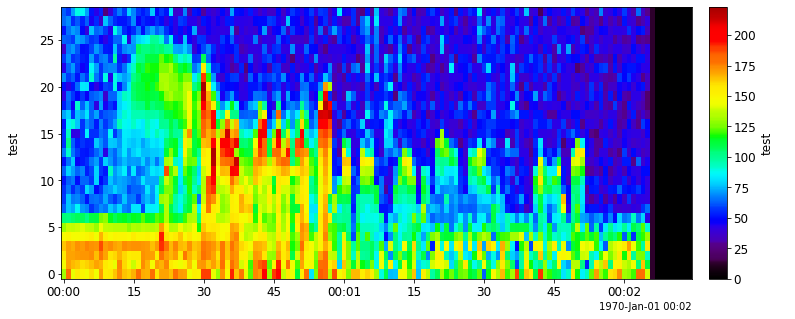

In [71]:
pytplot.tplot('test')